# Multi-model mean - Seasonal maps

## Objective 

The objective of this notebook is to create multi-model averages of snow cover by incorporating each model’s score using the selected Gaussian weighting method. This weighted average will then be used to generate snow cover maps according to different warming levels for each season.

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-10T09:17:13.306450+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-63-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Absolute path to the folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# adding the path to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_Internship_Laurie_Vayssettes


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

cdo       : 1.6.1
numpy     : 2.0.2
watermark : 2.5.0
csv       : 1.0
netCDF4   : 1.7.2
xarray    : 2025.1.1
matplotlib: 3.10.0
seaborn   : 0.13.2
skimage   : 0.25.0
cartopy   : 0.24.0
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
xesmf     : 0.8.8
pandas    : 2.2.3



## List of files used

In [6]:
# Display files as a list
files = os.listdir("/home/jovyan/shared-storage/Data_LaurieV/output_data2/snow_SW_1995-2014/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['BCC-CSM2-MR_SW_reprojete.nc',
 'CanESM5_SW_reprojete.nc',
 'CanESM5-CanOE_SW_reprojete.nc',
 'CESM2_SW_reprojete.nc',
 'CESM2-WACCM_SW_reprojete.nc',
 'CIESM_SW_reprojete.nc',
 'CNRM-CM6-1_SW_reprojete.nc',
 'CNRM-CM6-1-HR_SW_reprojete.nc',
 'CNRM-ESM2-1_SW_reprojete.nc',
 'EC-Earth3_SW_reprojete.nc',
 'EC-Earth3-Veg_SW_reprojete.nc',
 'FGOALS-f3-L_SW_reprojete.nc',
 'FGOALS-g3_SW_reprojete.nc',
 'GFDL-CM4_SW_reprojete.nc',
 'GISS-E2-1-G_SW_reprojete.nc',
 'HadGEM3-GC31-LL_SW_reprojete.nc',
 'MIROC-ES2L_SW_reprojete.nc',
 'MIROC6_SW_reprojete.nc',
 'MPI-ESM1-2-HR_SW_reprojete.nc',
 'MPI-ESM1-2-LR_SW_reprojete.nc',
 'MRI-ESM2-0_SW_reprojete.nc',
 'NorESM2-LM_SW_reprojete.nc',
 'NorESM2-MM_SW_reprojete.nc',
 'UKESM1-0-LL_SW_reprojete.nc',
 'IPSL-CM6A-LR_SW_reprojete.nc']

## Snow reference

In [9]:
# path and file of the snow reference
path = "/home/jovyan/shared-storage/Data_LaurieV/input_data/grid/nhsce_mon.v01r01_19661004_20250303_1.0x1.0.nc"
ref_grid = xr.open_dataset(path)

#focus on the reference period
ref_grid = ref_grid.sel(time=slice("1995", "2014"))

#variable selection
snow_cover = ref_grid["snow_cover_extent"]

# monthly mean
snow_cover = snow_cover.groupby("time.month").mean(dim="time")
snow_cover

<xarray.DataArray 'snow_cover_extent' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  surface_snow_binary_mask
    long_name:      NOAA/NCEI Climate Data Record of snow cover extent
    cell_methods:   time: mean
    flag_values:    [0 1]
    flag_meanings:  no_snow snow_covered

In [10]:
# path and file of the area
path = "/home/jovyan/shared-storage/Data_LaurieV/input_data/grid/"
file = "area.nc"
area = xr.open_dataset(os.path.join(path, file))

In [11]:
# season definition
season_months = {
    "DJF": [12, 1, 2], #winter
    "MAM": [3, 4, 5], #spring
    "JJA": [6, 7, 8], #summer
    "SON": [9, 10, 11] #autumn
}

In [13]:
# Calculate Seasonal Average Snow Cover from Reference Data
seasonal_snow_reference = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snow_cover.sel(month=months_float)
    seasonal_snow_reference[season] = da_sel.mean(dim="month", skipna=True)

In [14]:
# Extract Seasonal Snow Cover Data for Each Season
djf_snow_reference = seasonal_snow_reference['DJF']
mam_snow_reference = seasonal_snow_reference['MAM']
jja_snow_reference = seasonal_snow_reference['JJA']
son_snow_reference = seasonal_snow_reference['SON']

In [15]:
# Convert seasonal snow cover to binary (presence/absence) using a 0.15 threshold
djf_snow_reference_binary = (djf_snow_reference > 0.15).astype(int)
mam_snow_reference_binary = (mam_snow_reference > 0.15).astype(int)
jja_snow_reference_binary = (jja_snow_reference > 0.15).astype(int)
son_snow_reference_binary = (son_snow_reference > 0.15).astype(int)

In [16]:
# variable selection
area = area["cell_area"]

# Convert area in km2
area_km2 = area * 1e-6

#Calculate winter snow-covered area (km²)
snow_cover_km2_winter = (djf_snow_reference_binary * area_km2).sum(dim=["lat", "lon"], skipna=True)

## Multi-Model Average with Score Weighting – Gaussian Function

In [17]:
# Load model scores from CSV file
scores_modeles = pd.read_csv("/home/jovyan/shared-storage/Data_LaurieV/output_data2/scores_modeles.csv", index_col=0)
scores_modeles

,Erreur_moyenne,Scores_exp,Scores_gauss
modèle_x,,,
MRI-ESM2-0,1.266978e+06,1.000000,1.000000
FGOALS-f3-L,1.609116e+06,0.968783,0.991986
NorESM2-LM,1.851120e+06,0.947293,0.976818
NorESM2-MM,1.869009e+06,0.945724,0.975395
IPSL-CM6A-LR,1.927405e+06,0.940619,0.970464
CIESM,1.962490e+06,0.937564,0.967296
CanESM5,2.056824e+06,0.929402,0.958024
CanESM5-CanOE,2.183057e+06,0.918590,0.943948
CESM2-WACCM,2.201267e+06,0.917041,0.941764


In [40]:
# Create a dictionary of snow cover data for each model by loading and processing relevant files
snow_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_snc = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data2/snow_SW_1995-2014/", files)
    path_areacella = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data2/areacella_recalcule/", files.replace("SW_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data2/sftlf/", files.replace("SW", "sftlf"))
                                 
    ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
    snc = extraction_variable(ds_snc, sftlf=ds_sftlf["sftlf"])
    sftlf = ds_sftlf["sftlf"]

    snow_cover_dict[model_name] = snc

La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variable 'sncbin' est en %. Conversion en fraction.
La variabl

In [19]:
# Print the 'type' coordinate values for each model's data array, if present
for model, da in snow_cover_dict.items():
    if 'type' in da.coords:
        print(f"{model}: {da['type'].values}")

CanESM5: b'land'
CNRM-CM6-1: b'typeland'
CNRM-CM6-1-HR: b'typeland'
CNRM-ESM2-1: b'typeland'
GISS-E2-1-G: b'land'
HadGEM3-GC31-LL: b'land'
MIROC-ES2L: b'land'
MIROC6: b'land'
MRI-ESM2-0: b'land'
UKESM1-0-LL: b'land'
IPSL-CM6A-LR: b'typeland'


In [20]:
# Remove 'type' coordinate from data arrays if it exists, then store cleaned arrays and model names
cleaned_snc = []
model_names = []

for model, da in snow_cover_dict.items():
    if 'type' in da.coords:
        da = da.drop_vars('type')

    cleaned_snc.append(da)
    model_names.append(model)

In [21]:
# Concatenate cleaned snow cover data arrays along a new 'model' dimension
all_snc = xr.concat(cleaned_snc, dim=xr.DataArray(model_names, dims="model"))

In [23]:
# Create the weight vector for each model based on its obtained score
weights = xr.DataArray(
    scores_modeles["Scores_gauss"],
    coords = {"modèle_x": scores_modeles.index},
    dims="modèle_x"
)

In [25]:
# Rename coordinate from 'modele_x' to 'model' and replace underscores with hyphens in model names
weights = weights.rename({"modèle_x": "model"})
weights = weights.assign_coords(
    model=[m.replace("_", "-") for m in weights.model.values]
)

In [26]:
#Apply weights to each model’s snow cover data
weighted = all_snc * weights
weighted

<xarray.DataArray (model: 25, GSAT: 23, month: 12, lat: 70, lon: 360)> Size: 1GB
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -1.5 -1.25 -1.0 -0.75 -0.5 ... 3.25 3.5 3.75 4.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * model    (model) <U15 2kB 'BCC-CSM2-MR' 'CanESM5' ... 'IPSL-CM6A-LR'

In [27]:
# Align snow cover data and weights along common models to ensure matching dimensions
all_snc, weights = xr.align(all_snc, weights, join="inner")

In [28]:
# Calculate weighted average snow cover across models using their respective weights
mean_snc_pondere = (all_snc * weights).sum(dim="model") / weights.sum(dim="model")

In [29]:
# Select weighted snow cover data for specific GSAT warming levels
snc_gsat_05_pondere = mean_snc_pondere.sel(GSAT=-0.5)
snc_gsat0_pondere = mean_snc_pondere.sel(GSAT=0.0)
snc_gsat1_pondere = mean_snc_pondere.sel(GSAT=1.0)
snc_gsat2_pondere = mean_snc_pondere.sel(GSAT=2.0)
snc_gsat3_pondere = mean_snc_pondere.sel(GSAT=3.0)
snc_gsat4_pondere = mean_snc_pondere.sel(GSAT=4.0)

## Definition of seasons

In [30]:
# Definition of seasons
season_months = {
    "DJF": [12, 1, 2],
    "MAM": [3, 4, 5],
    "JJA": [6, 7, 8],
    "SON": [9, 10, 11]
}

In [31]:
#Calculate seasonal averages of weighted snow cover for different GSAT warming levels
seasonal_snc_gsat_05_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snc_gsat_05_pondere.sel(month=months_float)
    seasonal_snc_gsat_05_pondere[season] = da_sel.mean(dim="month", skipna=True)
    
seasonal_snc_gsat0_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snc_gsat0_pondere.sel(month=months_float)
    seasonal_snc_gsat0_pondere[season] = da_sel.mean(dim="month", skipna=True)
    
seasonal_snc_gsat1_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snc_gsat1_pondere.sel(month=months_float)
    seasonal_snc_gsat1_pondere[season] = da_sel.mean(dim="month", skipna=True)

seasonal_snc_gsat2_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snc_gsat2_pondere.sel(month=months_float)
    seasonal_snc_gsat2_pondere[season] = da_sel.mean(dim="month", skipna=True)

seasonal_snc_gsat3_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snc_gsat3_pondere.sel(month=months_float)
    seasonal_snc_gsat3_pondere[season] = da_sel.mean(dim="month", skipna=True)

seasonal_snc_gsat4_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = snc_gsat4_pondere.sel(month=months_float)
    seasonal_snc_gsat4_pondere[season] = da_sel.mean(dim="month", skipna=True)

seasonal_mean_snc_pondere = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = mean_snc_pondere.sel(month=months_float)
    seasonal_mean_snc_pondere[season] = da_sel.mean(dim="month", skipna=True)

In [32]:
# Convert weighted seasonal snow cover to binary presence/absence using a 0.15 threshold
seasonal_snc_binary_50_pondere = {
    season: xr.where(da > 0.15, 1, 0).where(~da.isnull())
    for season, da in seasonal_mean_snc_pondere.items()
}

In [33]:
# Select binary DJF snow cover data for specific GSAT warming levels
djf_snc_gsat05 = seasonal_snc_binary_50_pondere['DJF'].sel(GSAT=-0.5)
djf_snc_gsat0 = seasonal_snc_binary_50_pondere['DJF'].sel(GSAT=0)
djf_snc_gsat1 = seasonal_snc_binary_50_pondere['DJF'].sel(GSAT=1)
djf_snc_gsat2 = seasonal_snc_binary_50_pondere['DJF'].sel(GSAT=2)
djf_snc_gsat3 = seasonal_snc_binary_50_pondere['DJF'].sel(GSAT=3)
djf_snc_gsat4 = seasonal_snc_binary_50_pondere['DJF'].sel(GSAT=4)

In [34]:
# Select binary MAM snow cover data for specific GSAT warming levels
mam_snc_gsat05 = seasonal_snc_binary_50_pondere['MAM'].sel(GSAT=-0.5)
mam_snc_gsat0 = seasonal_snc_binary_50_pondere['MAM'].sel(GSAT=0)
mam_snc_gsat1 = seasonal_snc_binary_50_pondere['MAM'].sel(GSAT=1)
mam_snc_gsat2 = seasonal_snc_binary_50_pondere['MAM'].sel(GSAT=2)
mam_snc_gsat3 = seasonal_snc_binary_50_pondere['MAM'].sel(GSAT=3)
mam_snc_gsat4 = seasonal_snc_binary_50_pondere['MAM'].sel(GSAT=4)

In [35]:
# Select binary JJA snow cover data for specific GSAT warming levels
jja_snc_gsat05 = seasonal_snc_binary_50_pondere['JJA'].sel(GSAT=-0.5)
jja_snc_gsat0 = seasonal_snc_binary_50_pondere['JJA'].sel(GSAT=0)
jja_snc_gsat1 = seasonal_snc_binary_50_pondere['JJA'].sel(GSAT=1)
jja_snc_gsat2 = seasonal_snc_binary_50_pondere['JJA'].sel(GSAT=2)
jja_snc_gsat3 = seasonal_snc_binary_50_pondere['JJA'].sel(GSAT=3)
jja_snc_gsat4 = seasonal_snc_binary_50_pondere['JJA'].sel(GSAT=4)

In [36]:
# Select binary SON snow cover data for specific GSAT warming levels
son_snc_gsat05 = seasonal_snc_binary_50_pondere['SON'].sel(GSAT=-0.5)
son_snc_gsat0 = seasonal_snc_binary_50_pondere['SON'].sel(GSAT=0)
son_snc_gsat1 = seasonal_snc_binary_50_pondere['SON'].sel(GSAT=1)
son_snc_gsat2 = seasonal_snc_binary_50_pondere['SON'].sel(GSAT=2)
son_snc_gsat3 = seasonal_snc_binary_50_pondere['SON'].sel(GSAT=3)
son_snc_gsat4 = seasonal_snc_binary_50_pondere['SON'].sel(GSAT=4)

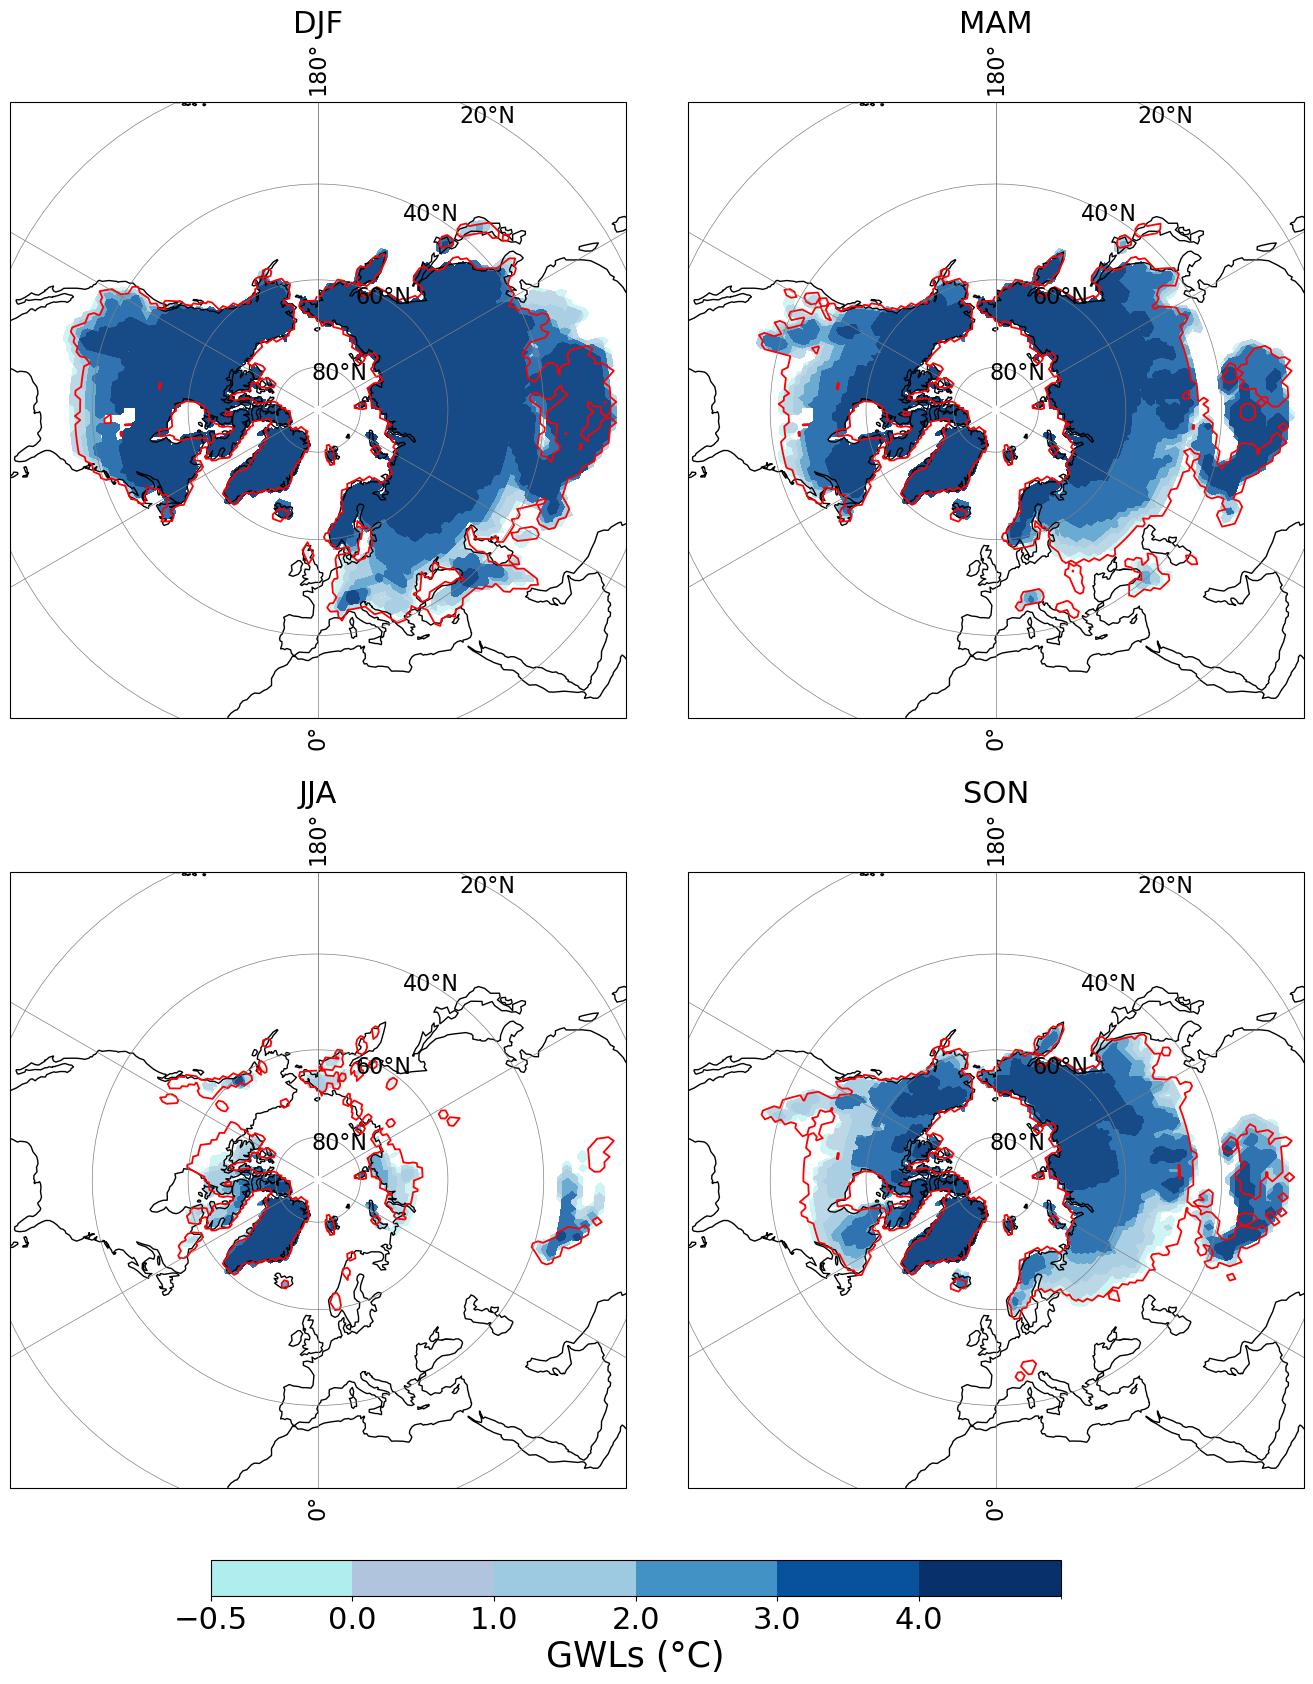

In [41]:
# Plot seasonal snow cover maps at different warming levels with consistent colors and colorbar

# Colors
colors = {
    "0°C-ref": "red",
    "-0.5°C": "paleturquoise",
    "0°C": "lightsteelblue",
    "1°C": "#9ECAE1",
    "2°C": "#4292C6",
    "3°C": "#08519C",
    "4°C": "#08306B"
}

# Dictionary of data by season
season_data = {
    "DJF": {
        "datas": {
            "snow_-0.5°C": djf_snc_gsat05,
            "snow_0°C": djf_snc_gsat0,
            "snow_1°C": djf_snc_gsat1,
            "snow_2°C": djf_snc_gsat2,
            "snow_3°C": djf_snc_gsat3,
            "snow_4°C": djf_snc_gsat4,
        },
        "ref": djf_snow_reference_binary
    },
    "MAM": {
        "datas": {
            "snow_-0.5°C": mam_snc_gsat05,
            "snow_0°C": mam_snc_gsat0,
            "snow_1°C": mam_snc_gsat1,
            "snow_2°C": mam_snc_gsat2,
            "snow_3°C": mam_snc_gsat3,
            "snow_4°C": mam_snc_gsat4,
        },
        "ref": mam_snow_reference_binary
    },
    "JJA": {
        "datas": {
            "snow_-0.5°C": jja_snc_gsat05,
            "snow_0°C": jja_snc_gsat0,
            "snow_1°C": jja_snc_gsat1,
            "snow_2°C": jja_snc_gsat2,
            "snow_3°C": jja_snc_gsat3,
            "snow_4°C": jja_snc_gsat4,
        },
        "ref": jja_snow_reference_binary
    },
    "SON": {
        "datas": {
            "snow_-0.5°C": son_snc_gsat05,
            "snow_0°C": son_snc_gsat0,
            "snow_1°C": son_snc_gsat1,
            "snow_2°C": son_snc_gsat2,
            "snow_3°C": son_snc_gsat3,
            "snow_4°C": son_snc_gsat4,
        },
        "ref": son_snow_reference_binary
    }
}

# Create the figure
fig, axes = plt.subplots(2, 2, figsize=(17, 18), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

# Plot for each season
for ax, (season, content) in zip(axes, season_data.items()):
    plot_snow_on_ax(ax, content["datas"], content["ref"], season, sftlf, colors)

# Legend
legend_elements = [
    Line2D([0], [0], color=clr, lw=2, label=adjust_label(temp))
    for temp, clr in colors.items()
]

# Actual color scale
temps = [-0.5, 0, +1, +2, +3, +4]
color_list = [
    "paleturquoise",
    "lightsteelblue",
    "#9ECAE1",
    "#4292C6",
    "#08519C",
    "#08306B"
]

# Create the colormap
cmap = mcolors.ListedColormap(color_list)
norm = mcolors.BoundaryNorm(boundaries=temps + [4.5], ncolors=len(color_list))  # +4.5 to extend upper limit

# Create the colorbar
cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap),
                    cax=cbar_ax,
                    orientation='horizontal',
                    ticks=temps)
cbar.set_label("GWLs (°C)", fontsize=25)
cbar.ax.tick_params(labelsize=22)

# Title
plt.subplots_adjust(wspace=0.06, hspace=0.25)

#plt.savefig("figures/seasonal_snow_extension_15%.png")
plt.show()

Seasonal Snow Extent by Warming Level

In this figure, each shade of blue represents a different warming level, while red indicates the reference. As expected, snow cover decreases as warming increases. Interestingly, between the +3°C and +4°C warming levels, snow appears to decline more abruptly compared to other warming steps—an intriguing observation worth further investigation.

## Convert to numeric values – Calculate surface areas

In [42]:
# Convert seasonal reference snow cover to binary presence/absence using a 0.15 threshold
djf_snow_reference_binary = (djf_snow_reference > 0.15).astype(int)
mam_snow_reference_binary = (mam_snow_reference > 0.15).astype(int)
jja_snow_reference_binary = (jja_snow_reference > 0.15).astype(int)
son_snow_reference_binary = (son_snow_reference > 0.15).astype(int)

In [43]:
# reference snow cover
#area = area["cell_area"]

# Calculate seasonal snow cover areas in km² by multiplying binary snow presence by cell area and summing over latitude and longitude
area_km2 = area * 1e-6

snow_cover_km2_winter = (djf_snow_reference_binary * area_km2).sum(dim=["lat", "lon"], skipna=True) #calcul de la superficie
snow_cover_km2_spring = (mam_snow_reference_binary * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_summer = (jja_snow_reference_binary * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_autumn = (son_snow_reference_binary * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_winter

<xarray.DataArray ()> Size: 8B
array(52522122.10524072)

In [44]:
# Load the recalculated grid cell area data from the specified NetCDF file
path_areacella = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data/areacella_recalcule/", "MRI-ESM2-0_gridarea_hist_recalcule.nc")
ds_area = xr.open_dataset(path_areacella)

areacella = ds_area["cell_area"]

In [45]:
# Convert cell area to km² and calculate total winter snow-covered area for each warming level
# Reproduce this step for each season

area_km2 = areacella * 1e-6
#winter
snow_cover_km2_05_winter = (djf_snc_gsat05 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_0_winter = (djf_snc_gsat0 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_1_winter = (djf_snc_gsat1 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_2_winter = (djf_snc_gsat2 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_3_winter = (djf_snc_gsat3 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_4_winter = (djf_snc_gsat4 * area_km2).sum(dim=["lat", "lon"], skipna=True)

In [46]:
# spring 
snow_cover_km2_05_spring = (mam_snc_gsat05 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_0_spring = (mam_snc_gsat0 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_1_spring = (mam_snc_gsat1 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_2_spring = (mam_snc_gsat2 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_3_spring = (mam_snc_gsat3 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_4_spring = (mam_snc_gsat4 * area_km2).sum(dim=["lat", "lon"], skipna=True)

In [47]:
# summer 
snow_cover_km2_05_summer = (jja_snc_gsat05 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_0_summer = (jja_snc_gsat0 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_1_summer = (jja_snc_gsat1 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_2_summer = (jja_snc_gsat2 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_3_summer = (jja_snc_gsat3 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_4_summer = (jja_snc_gsat4 * area_km2).sum(dim=["lat", "lon"], skipna=True)

In [48]:
snow_cover_km2_05_autumn = (son_snc_gsat05 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_0_autumn = (son_snc_gsat0 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_1_autumn = (son_snc_gsat1 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_2_autumn = (son_snc_gsat2 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_3_autumn = (son_snc_gsat3 * area_km2).sum(dim=["lat", "lon"], skipna=True)
snow_cover_km2_4_autumn = (son_snc_gsat4 * area_km2).sum(dim=["lat", "lon"], skipna=True)

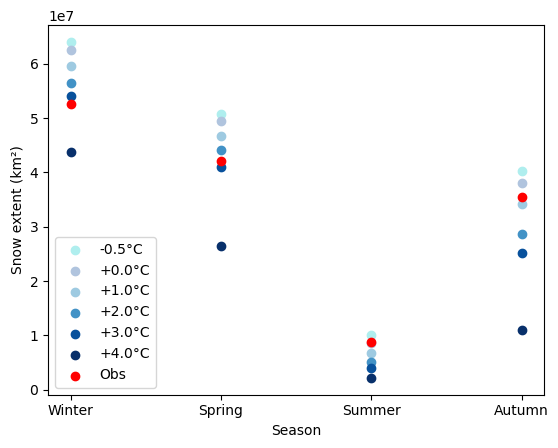

In [49]:
# Plot seasonal snow cover extent (in km²) for different warming levels and observations
seasons = [0, 1, 2, 3]
season_labels = ["Winter", "Spring", "Summer", "Autumn"]

# Plot snow extent for each warming scenario
plt.scatter(seasons, [snow_cover_km2_05_winter, snow_cover_km2_05_spring, snow_cover_km2_05_summer, snow_cover_km2_05_autumn], marker="o", label="-0.5°C", color="paleturquoise")
plt.scatter(seasons, [snow_cover_km2_0_winter, snow_cover_km2_0_spring, snow_cover_km2_0_summer, snow_cover_km2_0_autumn], marker="o", label="+0.0°C", color="lightsteelblue")
plt.scatter(seasons, [snow_cover_km2_1_winter, snow_cover_km2_1_spring, snow_cover_km2_1_summer, snow_cover_km2_1_autumn], marker="o", label="+1.0°C", color="#9ECAE1")
plt.scatter(seasons, [snow_cover_km2_2_winter, snow_cover_km2_2_spring, snow_cover_km2_2_summer, snow_cover_km2_2_autumn], marker="o", label="+2.0°C", color="#4292C6")
plt.scatter(seasons, [snow_cover_km2_3_winter, snow_cover_km2_3_spring, snow_cover_km2_3_summer, snow_cover_km2_3_autumn], marker="o", label="+3.0°C", color="#08519C")
plt.scatter(seasons, [snow_cover_km2_4_winter, snow_cover_km2_4_spring, snow_cover_km2_4_summer, snow_cover_km2_4_autumn], marker="o", label="+4.0°C", color="#08306B")
plt.scatter(seasons, [snow_cover_km2_winter, snow_cover_km2_spring, snow_cover_km2_summer, snow_cover_km2_autumn], marker="o", label="Obs", color="red")

plt.xticks(seasons, season_labels)
plt.xlabel("Season")
plt.ylabel("Snow extent (km²)")
plt.legend()
#plt.savefig("figures/seasonal_snow_extent_km2.png")
plt.show()

Seasonal values of the snow cover extent (km2) for each GWL. Each blue color represents a different warming and the red corresponds to the observations.

This figure confirms the initial observations made from the spatial maps. Between -0.5°C and +3°C of warming, the decrease in snow cover appears to follow a relatively linear trend. However, between +3°C and +4°C, the decline becomes much steeper—particularly during winter, spring, and autumn—indicating a more abrupt loss of snow extent at higher warming levels.

## Conclusion

This notebook aimed to evaluate and weight snow cover simulations from multiple climate models by comparing them to observational reference data.

Using a Gaussian-based weighting method, a multi-model mean was computed, offering a more accurate representation of historical snow cover. Finally, projections under different global warming levels showed a gradual decline in snow extent up to +3°C, followed by a sharper drop beyond +3°C, especially in winter, spring, and autumn. This highlights the vulnerability of snow cover to higher warming thresholds and the importance of careful model selection.